$$
\mathcal{I} = \int_\Omega e^{-|\bm{x}|^2} \mathrm{d} \bm{x} = \left (\int_0^1 e^{-|{x}|^2} \mathrm{d} {x} \right )^d, \; \Omega = [0, 1]^d
$$

In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [2]:
def custom_integrate(func, quads):
    points, weights = quads
    if isinstance(weights, np.ndarray):
        assert points.shape[0] == weights.shape[0]
    return np.sum(weights * func(points))

In [3]:
def f(x):
    x_norm = np.linalg.norm(x, ord=2, axis=-1, keepdims=True)
    return np.exp(-x_norm**2)

In [4]:
integral_1d = integrate.quad(lambda x: np.exp(-x**2), 0, 1)[0]
integral_2d = integrate.dblquad(lambda x_1, x_2: np.exp(-(x_1**2+x_2**2)), 0, 1, 0, 1)[0]

print(integral_1d, integral_2d, integral_1d**2)

0.7468241328124271 0.5577462853510337 0.5577462853510338


In [5]:
N = 2**10
# Monte Carlo
rng = np.random.default_rng(0)
points = rng.uniform(0.0, 1.0, size=(N, 1))
weights = np.ones((N, 1)) / N
integral_1d_mc = custom_integrate(func = f, quads = [points, weights])

# Trapezoidal formula
points = np.linspace(0.0, 1.0, N).reshape((-1, 1))
weights = np.ones((N, 1)) / (N-1)
weights[0, 0] = weights[-1, 0] = 0.5 / (N-1)
integral_1d_trap = custom_integrate(func = f, quads = [points, weights])

print(integral_1d_mc, integral_1d_trap)

0.7369941595051059 0.7468240742251904


In [6]:
N = 2**10
# Monte Carlo for d = 2
rng = np.random.default_rng(0)
points = rng.uniform(0.0, 1.0, size=(N, 2))
weights = np.ones((N, 1)) / N
integral_2d_mc = custom_integrate(func = f, quads = [points, weights])
integral_2d_mc

0.5565640170002342

In [7]:
# order test for d = 1
d = 1
mc_errs = []
ns = []
for n in np.linspace(100, 10000, 100):
    int_n = int(n)
    ns.append(int_n)
    rpoints = rng.uniform(0.0, 1.0, size=(int_n, d))
    weights = np.ones((int_n, 1)) / int_n
    MC_I = custom_integrate(f, (rpoints, weights))
    mc_errs.append(np.abs(MC_I - integral_1d))

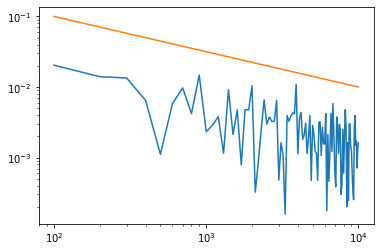

In [8]:
plt.loglog(ns, mc_errs, ns, 1.0 / np.sqrt(np.asarray(ns)))

In [9]:
N = 2**25
# Monte Carlo for d = 10
rng = np.random.default_rng(0)
points = rng.uniform(0.0, 1.0, size=(N, 10))
weights = np.ones((N, 1)) / N
integral_10d_mc = custom_integrate(func = f, quads = [points, weights])
integral_10d_mc, integral_1d**10

(0.05397077078684821, 0.05397385432900757)

In [10]:
# order test for d = 10
d = 10
mc_errs = []
ns = []
for n in np.linspace(2**8, 2**24, 2**8):
    int_n = int(n)
    ns.append(int_n)
    rpoints = rng.uniform(0.0, 1.0, size=(int_n, d))
    weights = np.ones((int_n, 1)) / int_n
    MC_I = custom_integrate(f, (rpoints, weights))
    mc_errs.append(np.abs(MC_I - integral_1d**10))

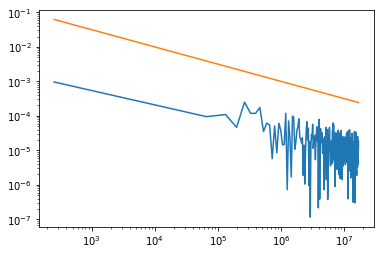

In [11]:
plt.loglog(ns, mc_errs, ns, 1.0 / np.sqrt(np.asarray(ns)))

In [ ]:
# a = [1, 1, 1]
# p = np.poly1d(a)
# p_prime = p.deriv()
# x = np.ones((10, 1))
# p_prime(x)